In [62]:
import math
import numpy as np

import sys
sys.path.append('E:\\users\\cl\\anaconda3\\envs\\python36\\lib\\site-packages')

import cv2 as cv
path = '10047.jpg'
img = cv.imread(path)

height, width, channels = img.shape
print(height, width, channels)
origin = (int(width/2), int(height/2))

857 646 3


In [63]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.
    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    
    new_center_x = int (height / 2) 
    new_center_y = int (width / 2)
    
    return round(qx + (new_center_x - ox)), round(qy + (new_center_y - oy))

In [64]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
    return result

In [65]:
with open("10047.txt", "r") as f:
    lines = f.readlines()

In [66]:
# line = "209,0,227,0,234,168,213,169,sign"
for line in lines:
    splitted_line = line.strip().lower().split(',')
    print(splitted_line)
    
    rotated_list = []
    tag = splitted_line[8]
    
    # filter
    if(tag != 'sign'):
        for i in range(0, 7, 2):
    #         print(splitted_line[i] + ', ' + splitted_line[i + 1])
            nx = int(splitted_line[i])
            ny = int(splitted_line[i + 1])
            rotated_list.append(rotate(origin, (nx, ny), math.radians(90)))
        
        with open("output.txt", "a") as f:
            for i in range(0, len(rotated_list)):
                for item in rotated_list[i]:
                    f.writelines(str(item))
                    f.writelines(",")
            f.writelines(tag)
            f.writelines("\n")

['116', '14', '299', '56', '225', '849', '33', '842', 'sign']
['151', '42', '285', '64', '216', '836', '64', '829', 'chinese']
['149', '42', '283', '64', '270', '182', '134', '159', 'chinese']
['137', '159', '270', '186', '264', '304', '122', '283', 'chinese']
['120', '285', '264', '305', '252', '436', '112', '414', 'chinese']
['111', '415', '246', '441', '237', '571', '96', '556', 'chinese']
['97', '562', '240', '573', '229', '701', '82', '694', 'chinese']
['83', '697', '227', '710', '216', '830', '66', '830', 'chinese']


In [67]:
# splitted_line

In [68]:
# for i in range(0, 7, 2):

#     print(splitted_line[i] + ', ' + splitted_line[i + 1])
#     nx = int(splitted_line[i])
#     ny = int(splitted_line[i + 1])
#     rotated_list.append(rotate(origin, (nx, ny), math.radians(90)))

In [69]:
# rotated_list

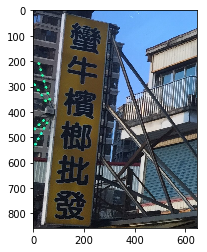

In [70]:
from matplotlib import pyplot as plt

show_img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

plt.imshow(show_img)
plt.show()

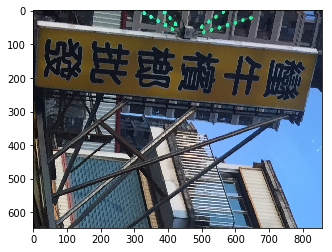

In [71]:
rotatedImg = cv.transpose(img)
rotatedImg = cv.flip(rotatedImg, 1)

show_img = cv.cvtColor(rotatedImg, cv.COLOR_BGR2RGB) 

plt.imshow(show_img)
plt.show()

In [72]:
cv.imwrite("out.png", rotatedImg)

True

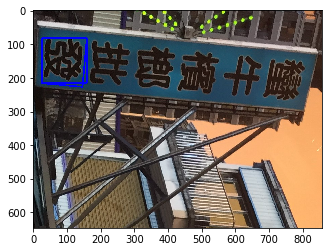

In [73]:
for i in range(0, 3):
    for j in range(0, 3):
        if(i != j and (i - j) != 2 and (i - j) != -2):
            cv.line(rotatedImg, rotated_list[i], rotated_list[j], (0, 0, 255), 3)

cv.rectangle(rotatedImg, rotated_list[0], rotated_list[2], (0, 0, 255), 3)
plt.imshow(rotatedImg)
plt.show()

In [74]:
# with open("output.txt", "w") as f:
#     for i in range(0, len(rotated_list)):
#         for item in rotated_list[i]:
#             f.writelines(str(item))
#             f.writelines(",")
#     f.writelines(tag)
#     f.writelines("\n")

In [75]:
(a, b) = rotate((100, 200), (100, 0), math.radians(90))
print(a, b)

new_center_x = int (400 / 2) 
new_center_y = int (200 / 2)

transition = (new_center_x - 100, new_center_y - 200)
print(transition)

628 323
(100, -100)
